<h3>Field Analysis</h3>

* Number of total records in the set
* Number of non-null values per field
* Percentage of those values that are properly filled
* Text: How many unique values exist in per field
* Text: How many records exist in each unique value
* Text: Vizualize if less than 50 unique values
* Numeric: Distribution of the data
* Dates: Record reation by date

<h6>Setup import of data and date formatting</h6>

In [229]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import numpy as np
field_names = []
#Filepath of the object, use example for now:
filepath = '~/Downloads/cumulative.csv'
df = pandas.read_csv(filepath, header = None, sep = ',')

<h6>Number of non-null values per field</h6>

In [145]:
field_count = df[5].dropna().count()
print 'Total number of records: ' + str(record_count)
print 'Total number of non-null values: ' + str(field_count)

percent_not_null = (float(field_count)/record_count)*100

print 'Percent of field not null: '+ str(percent_not_null)

Total number of records: 8827
Total number of non-null values: 8470
Percent of field not null: 95.955590801


<h3>Textual Datatypes</h3>
<h6>Number of unique values of this field</h6>

In [158]:
num_unique = df[2].nunique()
print 'This field has ' + str(num_unique) + ' unique values.'

potential_picklist = False
if num_unique < 50:
    potential_picklist = True

This field has 4 unique values.


<h6>Dupes allowed (counting rowid not uid)</h6>

2
CANDIDATE          3704
CONFIRMED          1003
FALSE POSITIVE     4119
koi_disposition       1
Name: 0, dtype: int64


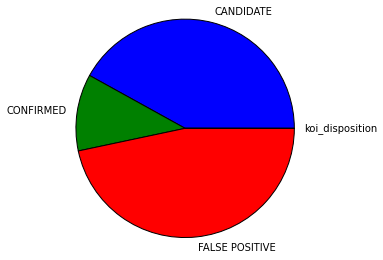

In [159]:
grouped_count = df.groupby(2)[0].nunique()
print grouped_count

if potential_picklist:
    plt.pie(grouped_count, labels = grouped_count.index)
    plt.axis('equal')
    plt.show()

<h6>Truly unique (counting uid and will exclude dupes)</h6>

2
CANDIDATE          3288
CONFIRMED           440
FALSE POSITIVE     4013
koi_disposition       1
Name: 1, dtype: int64


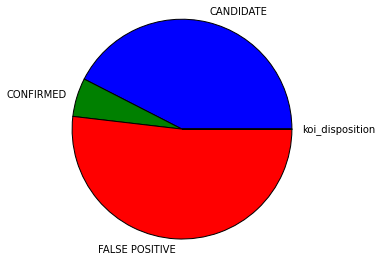

In [218]:
distinct_count = df.groupby(2)[1].nunique()
print distinct_count

if potential_picklist:
    plt.pie(distinct_count, labels = grouped_count.index)
    plt.axis('equal')
    plt.show()

<h3>Numeric Datatypes</h3>
<h6>Data distribution</h6>

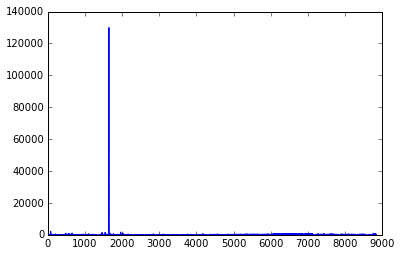

In [228]:
df[4] = df[4].map(lambda x: x.replace(',',''))
valid_nums = df[4].drop(0).dropna()
num_array = valid_nums.values.astype(float)
plt.plot(num_array)
plt.show()

<h3>Dates/Datetimes</h3>
<h6>Record Creation Time Series</h6>

In [371]:
date_format = '%b %d %Y  %H:%M:%S:%f%p'
dates = pandas.to_datetime(pandas.Series(['Jun 17 2003  6:45:30:20AM', 'Jun 17 2003  6:45:30:2001PM', 'Jul 17 2003  6:45:30:2001PM']), format = date_format)
dates = dates.map(lambda x: x.date())
dates_frame = pandas.DataFrame(dates.groupby([0]).value_counts())
print dates_frame

TypeError: 'datetime.date' object is not callable

<h6>Count the Number of records per date and create time series.</h6>

In [364]:
plt.plot(dates_frame)
plt.show()

KeyError: 0